## Part I: Data Analysis & Preprocessing [10 points]

In [1]:
import pandas as pd
import numpy as np

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
df=pd.read_csv('Data/noisy_datasets/penguins.csv')
df

,species,island,calorie requirement,average sleep duration,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,gender,year
0,Adelie,Torgersen,6563,11,39.10,18.70,181.0,3750.0,male,2007.0
1,Adelie,Torgersen,4890,14,39.50,17.40,186.0,3800.0,female,2007.0
2,Adelie,Torgersen,7184,11,40.30,18.00,195.0,3250.0,female,2007.0
3,Adelie,Torgersen,4169,8,NaN,NaN,NaN,992.0,NaN,2007.0
4,Adelie,Torgersen,4774,8,36.70,19.30,193.0,3450.0,female,2007.0
5,Adelie,Torgersen,4403,13,39.30,20.60,190.0,3650.0,male,2007.0
6,Adelie,Torgersen,5071,11,38.90,17.80,181.0,3625.0,female,2007.0
7,Adelie,Torgersen,6799,9,39.20,19.60,195.0,4675.0,male,2007.0
8,Adelie,Torgersen,5593,8,34.10,18.10,193.0,3475.0,NaN,2007.0
9,Adelie,Torgersen,6275,7,42.00,20.20,190.0,4250.0,NaN,2007.0


In [3]:
df.describe()

,calorie requirement,average sleep duration,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,344.000000,344.000000,337.000000,333.000000,336.000000,339.000000,342.000000
mean,5270.002907,10.447674,45.494214,18.018318,197.764881,4175.463127,2008.035088
std,1067.959116,2.265895,10.815787,9.241384,27.764491,858.713267,0.816938
min,3504.000000,7.000000,32.100000,13.100000,10.000000,882.000000,2007.000000
25%,4403.000000,9.000000,39.500000,15.700000,190.000000,3550.000000,2007.000000
50%,5106.500000,10.000000,45.100000,17.300000,197.000000,4050.000000,2008.000000
75%,6212.750000,12.000000,49.000000,18.700000,213.000000,4750.000000,2009.000000
max,7197.000000,14.000000,124.300000,127.260000,231.000000,6300.000000,2009.000000


In [4]:
df.shape

(344, 10)

In [5]:
#finds columns with null values
df.isna().sum()
df

,species,island,calorie requirement,average sleep duration,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,gender,year
0,Adelie,Torgersen,6563,11,39.10,18.70,181.0,3750.0,male,2007.0
1,Adelie,Torgersen,4890,14,39.50,17.40,186.0,3800.0,female,2007.0
2,Adelie,Torgersen,7184,11,40.30,18.00,195.0,3250.0,female,2007.0
3,Adelie,Torgersen,4169,8,NaN,NaN,NaN,992.0,NaN,2007.0
4,Adelie,Torgersen,4774,8,36.70,19.30,193.0,3450.0,female,2007.0
5,Adelie,Torgersen,4403,13,39.30,20.60,190.0,3650.0,male,2007.0
6,Adelie,Torgersen,5071,11,38.90,17.80,181.0,3625.0,female,2007.0
7,Adelie,Torgersen,6799,9,39.20,19.60,195.0,4675.0,male,2007.0
8,Adelie,Torgersen,5593,8,34.10,18.10,193.0,3475.0,NaN,2007.0
9,Adelie,Torgersen,6275,7,42.00,20.20,190.0,4250.0,NaN,2007.0


In [6]:
df['species']=df['species'].fillna(df['species'].mode()[0])
df['island']=df['island'].fillna(df['island'].mode()[0])
df['gender']=df['gender'].fillna(df['gender'].mode()[0])
df['bill_length_mm']=df['bill_length_mm'].fillna(df['bill_length_mm'].mean())
df['bill_depth_mm']=df['bill_depth_mm'].fillna(df['bill_depth_mm'].mean())
df['flipper_length_mm']=df['flipper_length_mm'].fillna(df['flipper_length_mm'].mean())
df['body_mass_g']=df['body_mass_g'].fillna(df['body_mass_g'].median())
df['year']=df['year'].fillna(df['year'].mode()[0])
df.isna().sum()

species                   0
island                    0
calorie requirement       0
average sleep duration    0
bill_length_mm            0
bill_depth_mm             0
flipper_length_mm         0
body_mass_g               0
gender                    0
year                      0
dtype: int64

In [7]:
def standardize(value):
    return value.capitalize()
df['species']=df['species'].apply(standardize)
df['island']=df['island'].apply(standardize)
df['gender']=df['gender'].apply(standardize)

In [8]:
df

,species,island,calorie requirement,average sleep duration,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,gender,year
0,Adelie,Torgersen,6563,11,39.100000,18.700000,181.000000,3750.0,Male,2007.0
1,Adelie,Torgersen,4890,14,39.500000,17.400000,186.000000,3800.0,Female,2007.0
2,Adelie,Torgersen,7184,11,40.300000,18.000000,195.000000,3250.0,Female,2007.0
3,Adelie,Torgersen,4169,8,45.494214,18.018318,197.764881,992.0,Male,2007.0
4,Adelie,Torgersen,4774,8,36.700000,19.300000,193.000000,3450.0,Female,2007.0
5,Adelie,Torgersen,4403,13,39.300000,20.600000,190.000000,3650.0,Male,2007.0
6,Adelie,Torgersen,5071,11,38.900000,17.800000,181.000000,3625.0,Female,2007.0
7,Adelie,Torgersen,6799,9,39.200000,19.600000,195.000000,4675.0,Male,2007.0
8,Adelie,Torgersen,5593,8,34.100000,18.100000,193.000000,3475.0,Male,2007.0
9,Adelie,Torgersen,6275,7,42.000000,20.200000,190.000000,4250.0,Male,2007.0


In [9]:
columns=['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']
def impute_outlier(df, column):
    impute_column = df[column]
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    non_outlier_mean = impute_column[(df[column] >= lower_bound) & (df[column] <= upper_bound)].median()

    def impute_value(value):
        if value < lower_bound or value > upper_bound:
            return non_outlier_mean
        else:
            return value

    df[column] = df[column].apply(impute_value)

for column in columns:
    impute_outlier(df, column)

df

,species,island,calorie requirement,average sleep duration,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,gender,year
0,Adelie,Torgersen,6563,11,39.100000,18.700000,181.000000,3750.0,Male,2007.0
1,Adelie,Torgersen,4890,14,39.500000,17.400000,186.000000,3800.0,Female,2007.0
2,Adelie,Torgersen,7184,11,40.300000,18.000000,195.000000,3250.0,Female,2007.0
3,Adelie,Torgersen,4169,8,45.494214,18.018318,197.764881,4050.0,Male,2007.0
4,Adelie,Torgersen,4774,8,36.700000,19.300000,193.000000,3450.0,Female,2007.0
5,Adelie,Torgersen,4403,13,39.300000,20.600000,190.000000,3650.0,Male,2007.0
6,Adelie,Torgersen,5071,11,38.900000,17.800000,181.000000,3625.0,Female,2007.0
7,Adelie,Torgersen,6799,9,39.200000,19.600000,195.000000,4675.0,Male,2007.0
8,Adelie,Torgersen,5593,8,34.100000,18.100000,193.000000,3475.0,Male,2007.0
9,Adelie,Torgersen,6275,7,42.000000,20.200000,190.000000,4250.0,Male,2007.0


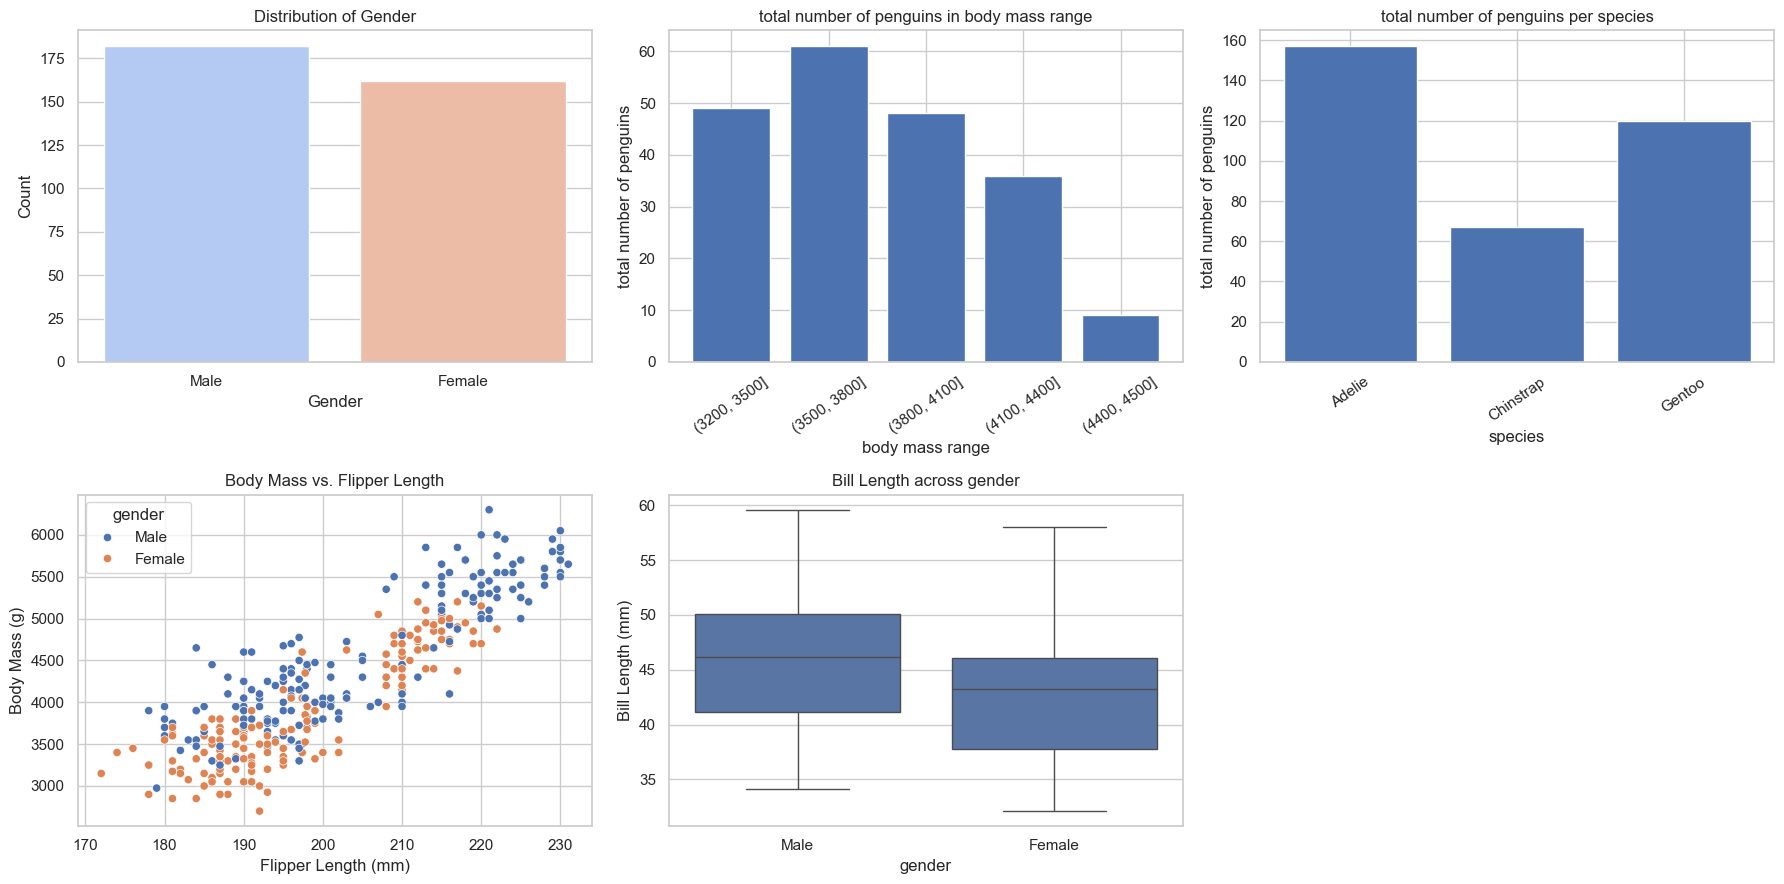

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
plt.figure(figsize=(18, 9))

#1.
plt.subplot(2, 3, 1)
sns.countplot(x='gender', data=df, hue='gender', palette="coolwarm")
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

#2.
plt.subplot(2, 3, 2)
filtdf=df[(df['body_mass_g']>3200) & (df['body_mass_g']<=4500)].copy()
filtdf['body_mass_g_range']=pd.cut(filtdf['body_mass_g'],bins=[3200, 3500, 3800, 4100, 4400, 4500])
filt=filtdf.groupby(['body_mass_g_range'],observed=False).size()
plt.bar(filt.index.astype(str),filt.values)
plt.title('total number of penguins in body mass range')
plt.xlabel('body mass range')
plt.ylabel('total number of penguins')
plt.xticks(rotation=35)

#3
plt.subplot(2, 3, 3)
grpSpecies=df.groupby(['species'])['island'].count()
plt.bar(grpSpecies.index,grpSpecies.values)
plt.title('total number of penguins per species')
plt.xlabel('species')
plt.ylabel('total number of penguins')
plt.xticks(rotation=35)

#4
plt.subplot(2, 3, 4)
sns.scatterplot(x='flipper_length_mm', y='body_mass_g', hue='gender', data=df)
plt.title('Body Mass vs. Flipper Length')
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Body Mass (g)')

#5
plt.subplot(2, 3, 5)
sns.boxplot(x='gender', y='bill_length_mm', data=df)
plt.title('Bill Length across gender')
plt.xlabel('gender')
plt.ylabel('Bill Length (mm)')

# Adjust layout for better visibility
plt.tight_layout()
plt.show()
# END YOUR CODE

In [ ]:
def normalize(df,column):
    column_min = df[column].min()
    column_max = df[column].max()
    print("Minimum value for ",column," is: ",column_min)
    print("Maximum value for ",column," is: ",column_max)
    df[column] = (df[column] - column_min) / (column_max - column_min)

columns=['bill_length_mm', 'bill_depth_mm','flipper_length_mm', 'body_mass_g','calorie requirement']
for column in columns:
    normalize(df,column)
df

In [ ]:
df['species']=pd.Categorical(df['species']).codes
df['island']=pd.Categorical(df['island']).codes
df['gender']=pd.Categorical(df['gender']).codes
df.corr()


In [ ]:
df.to_csv('penguins_preprocessed.csv', sep=',', encoding='utf-8')

In [ ]:
# pd.set_option('future.no_silent_downcasting', True)
# columns = ['species', 'island', 'gender']
# df_encoded = pd.get_dummies(df[columns])
# df = pd.concat([df, df_encoded], axis=1)
# df.replace({True: 1, False: 0}, inplace=True)
# df

In [ ]:
# df.to_csv('sampledata', sep='\t', encoding='utf-8')

# df_non_categorical=df.drop(columns=['gender', 'species', 'island'])
# df_non_categorical.corr()